<a href="https://colab.research.google.com/github/dilunihetti/My-Projects/blob/main/AllLife_Bank_Personal_Loan_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
loandata = pd.read_csv("/content/drive/MyDrive/AIML_UTA/Machine Learning/Project/Loan_Modelling.csv")

In [ ]:
# make a copy of the data set
data = loandata.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
# checking the first 10 rows of the loan data set
data.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40000,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50000,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30000,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60000,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90000,3,0,1,0,0,0,0


In [ ]:
# Cheking the shape, number of rows and columns
data.shape

(5000, 14)

In [ ]:
# checking for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
# checking for duplicated values
data.duplicated().sum()

0

In [ ]:
# checking for data types and null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observations:

It looks like almost all the variables are as int type. As some of them represent categories we need to convert them to type 'category'. We don't need unique ID column, so that we can drop it.

In [ ]:
# Check the statistics of the data to understand more about the variables.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.00000,2500.50000,1443.52000,1.00000,1250.75000,2500.50000,3750.25000,5000.00000
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.10460,11.46795,-3.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
ZIPCode,5000.00000,93169.25700,1759.45509,90005.00000,91911.00000,93437.00000,94608.00000,96651.00000
Family,5000.00000,2.39640,1.14766,1.00000,1.00000,2.00000,3.00000,4.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Education,5000.00000,1.88100,0.83987,1.00000,1.00000,2.00000,3.00000,3.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000
Personal_Loan,5000.00000,0.09600,0.29462,0.00000,0.00000,0.00000,0.00000,1.00000


Observations:

Experience has a minimum of -3, which is not acceptable.

ZIPCode is not quantitative, so we have to convert it to category.

Mortgage min, 25%, 50% are all zeros.

In [ ]:
# Let's first drop the ID column with all unique values

print("There are ", data.ID.nunique(), "unique data in the ID column")

data = data.drop(["ID"], axis=1)
data.head()

There are  5000 unique data in the ID column


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


## Data Preprocessing

In [ ]:
# Let's evaluate Experience variable for it's suspicious -3.
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
if (data['Experience'] == -1).any().any():
    print('-1 count is',(data['Experience']==-1).sum())
if (data['Experience'] == -2).any().any():
      print('-2 count is',(data['Experience']==-2).sum())
if (data['Experience'] == -3).any().any():
      print('-3 count is',(data['Experience']==-3).sum())

-1 count is 33
-2 count is 15
-3 count is 4


In [ ]:
# There are 33 data points typed as -1, 15 as -2 and 4 as -3. As experience cannot be a negative integer let's convert it to positive integer.

for i in data['Experience']:
    if i in [-1]:
        data['Experience'] = data['Experience'].replace(-1, 1)
    elif i in [-2]:
        data['Experience'] = data['Experience'].replace(-2, 2)
    elif i in [-3]:
        data['Experience'] = data['Experience'].replace(-3, 3)

In [ ]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [ ]:
# check other variables include categories for value counts.

df = data[['Family', 'Education', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']]
for col in df:
  print(col, df[col].value_counts(normalize = True))


Family Family
1   0.29440
2   0.25920
4   0.24440
3   0.20200
Name: proportion, dtype: float64
Education Education
1   0.41920
3   0.30020
2   0.28060
Name: proportion, dtype: float64
Personal_Loan Personal_Loan
0   0.90400
1   0.09600
Name: proportion, dtype: float64
Securities_Account Securities_Account
0   0.89560
1   0.10440
Name: proportion, dtype: float64
CD_Account CD_Account
0   0.93960
1   0.06040
Name: proportion, dtype: float64
Online Online
1   0.59680
0   0.40320
Name: proportion, dtype: float64
CreditCard CreditCard
0   0.70600
1   0.29400
Name: proportion, dtype: float64


# Feature Engineering

In [ ]:
# As ZIPCode integers have no quantitative value we have to convert it to 'category'.
# Let's first convert zipcode to string, then take only first 2 digits of the zipcode (national area and sectional center) so that it will group the zipcodes in to a few groups.

data["ZIPCode"] = data["ZIPCode"].astype(str).str[0:2]

print("There are", data["ZIPCode"].str[0:2].nunique(), "two-digit unique zipcodes")

There are 7 two-digit unique zipcodes


In [ ]:
# Now let's convert all the categorical columns to 'category' as they are in 'int' type.

categorical_var = ['ZIPCode', 'Education', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']

data[categorical_var] = data[categorical_var].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.13460,11.41519,0.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
Family,5000.00000,2.39640,1.14766,1.00000,1.00000,2.00000,3.00000,4.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
# Function hist_box to create histogram and boxplot in same line

def hist_box(data, feature, figsize=(18, 4), kde=True, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=1, ncols=2,  # Number of rows and columns in subplot
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="lightblue"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="-"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="--"
    )  # Add median to the histogram

In [ ]:
# Function to create labeled barplots
def bar_lab(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 5))
    else:
        plt.figure(figsize=(n + 2, 5))

    plt.xticks(fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="rocket",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Function to plot distributions with reference to target class
def pred_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for class=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for class=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Univariant Analysis**

**Distribution of Age**

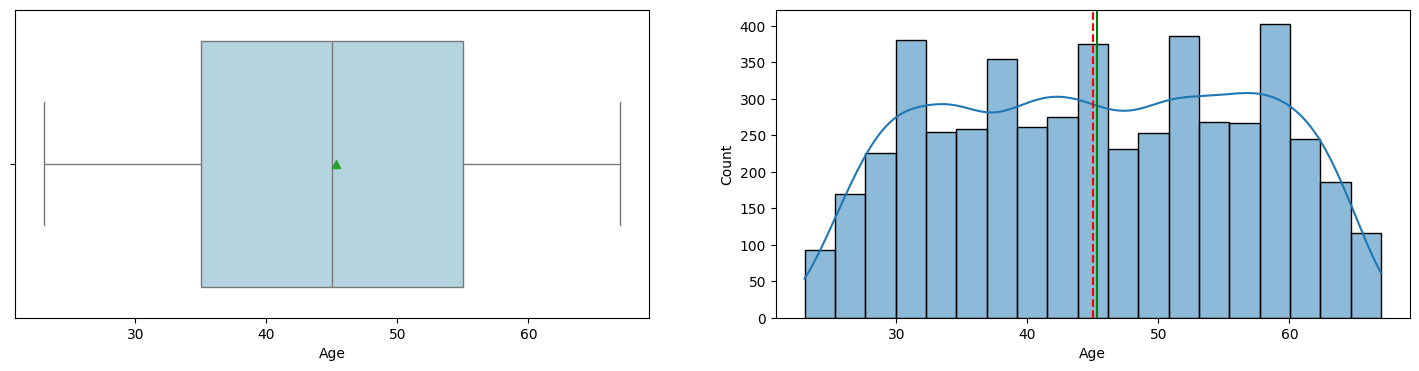

In [ ]:
hist_box(data, "Age")

Observations: The Age has a more or less uniform distribution. The median and mean are quite close.

**Distribution of Experience**

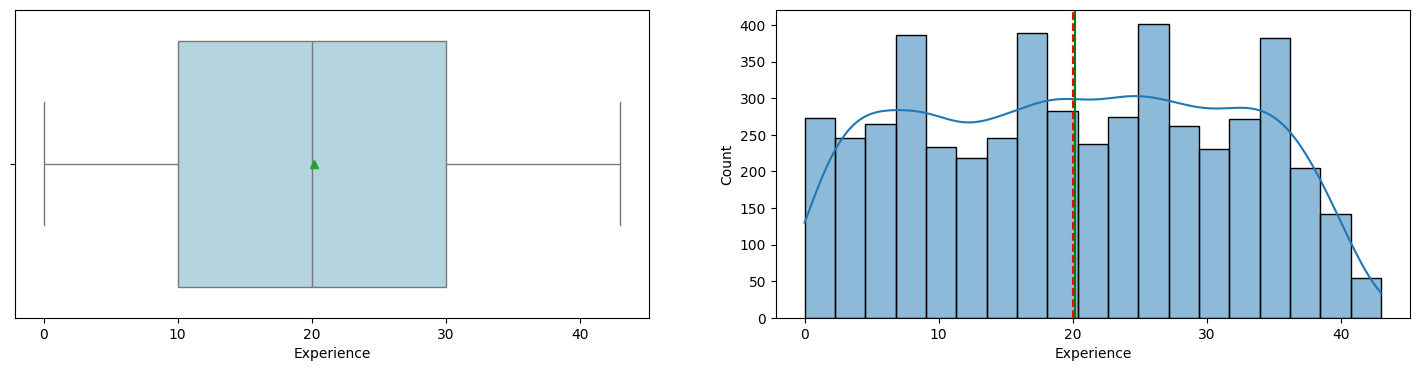

In [ ]:
hist_box(data, "Experience")

Observations: Experience has a similar distribution to Age, where mean and the median are very close to each other.

**Distribution of Income**

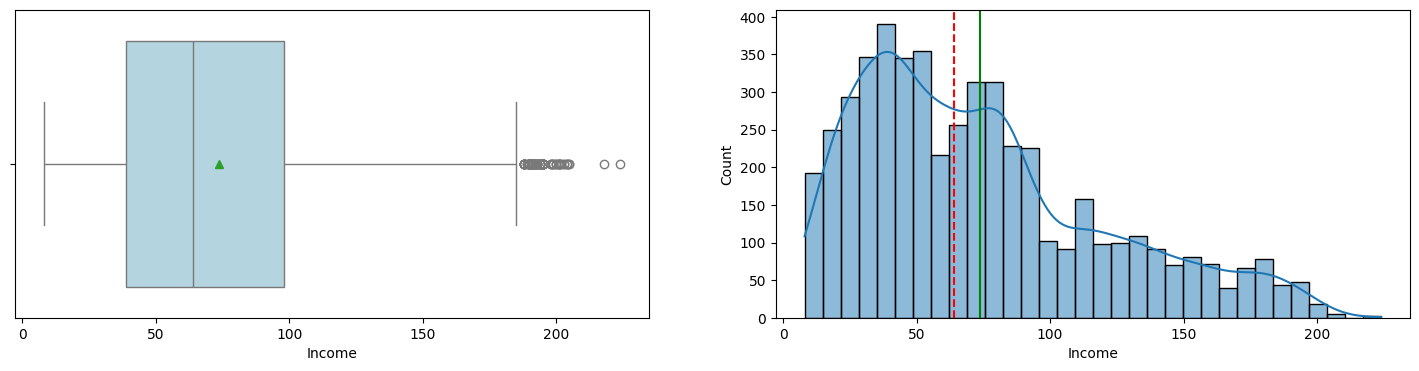

In [ ]:
hist_box(data, "Income")

Observations: Income is right skewed, 75% of the customers have income less than 100 k per year. Number of people with very high income are less.

**Distribution of CCAvg**

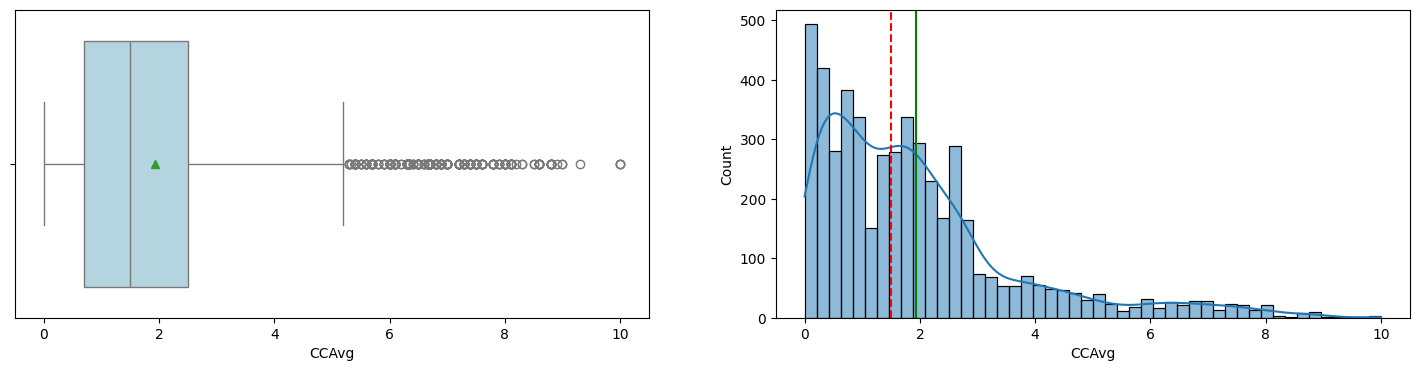

In [ ]:
hist_box(data, "CCAvg")

Observations: CCAvg (Average spending on credit cards per month (in thousand dollars)) is right skewed. Median CCAvg is less than $2000. There are many outliers.

**Distribution of Mortgage**

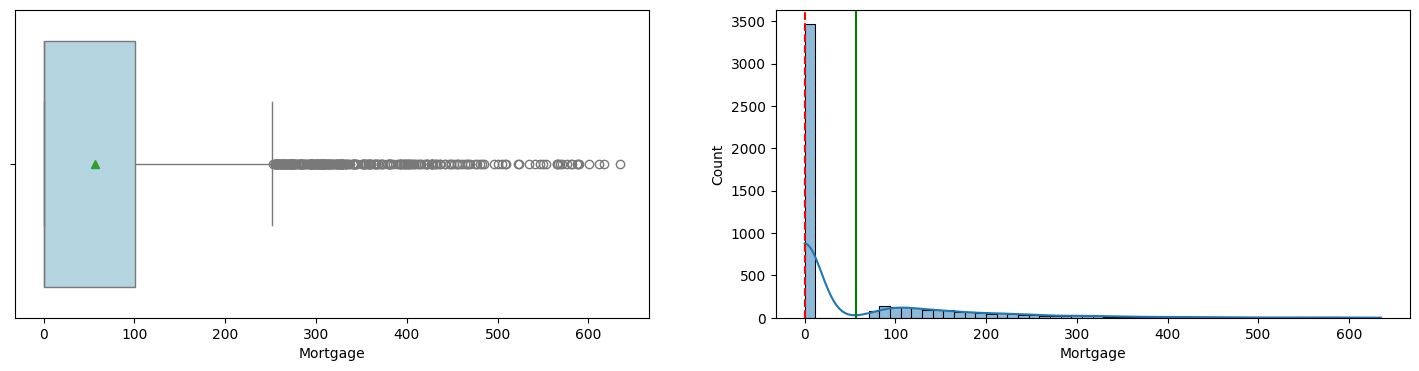

In [ ]:
hist_box(data, "Mortgage")

In [ ]:
data['Mortgage'].value_counts(normalize=True)

Mortgage
0     0.69240
98    0.00340
119   0.00320
89    0.00320
91    0.00320
        ...  
547   0.00020
458   0.00020
505   0.00020
361   0.00020
541   0.00020
Name: proportion, Length: 347, dtype: float64

**Questions:**

**What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?**

Observations: Mortgage is right skewed. There are many outliers. Out of 5000 data, there are 3462 or 69% of the Mortgage data are concentrated on 0 and there is a gap between 0 and the first positive mortage value. Therefore it is best to fit separate models including Mortgage data  and not including them. Then check best scores out of those models.

**Distribution of ZIPCode**

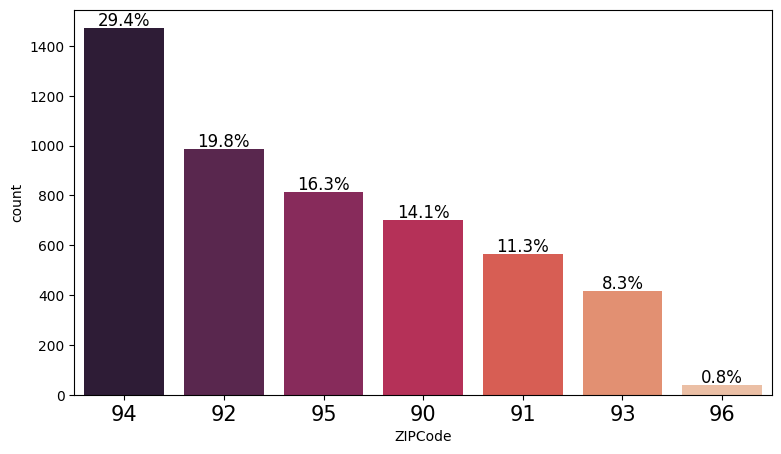

In [ ]:
bar_lab(data, "ZIPCode", perc=True)

Observations: 29.4% of customers are from the zipcode starts with 94, while zipcode 96 represents the least number of customers (only 0.8%) in this bank.

**Distribution of Family**

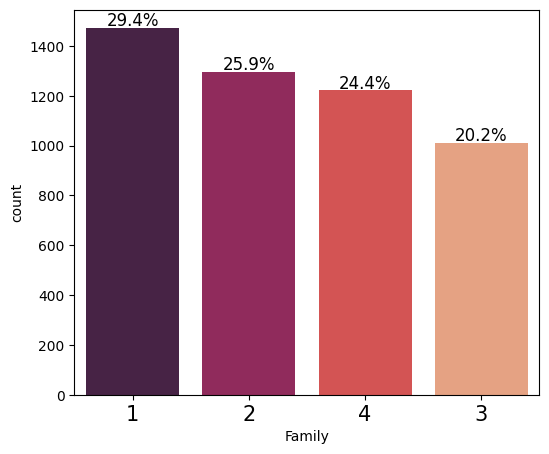

In [ ]:
bar_lab(data, "Family", perc=True)

Observations: 29.4% of the customers are singles. 25.9% have 2 family members. etc.

**Distribution of Education**

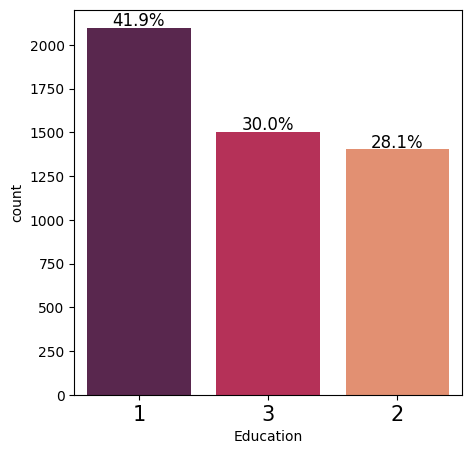

In [ ]:
bar_lab(data, "Education", perc=True)

Observations: 42% have undergraduate degree, 28% have a graduate degree and 30% have Advanced/Professional education.


**Distribution of Personal Loan**

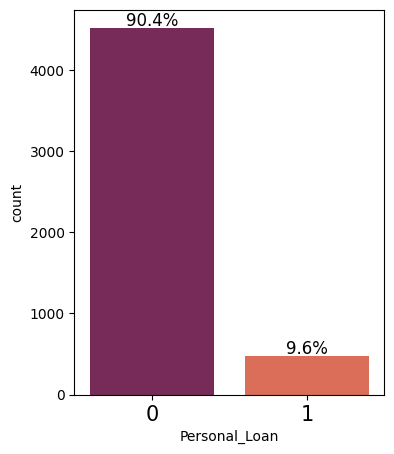

In [ ]:
bar_lab(data, "Personal_Loan", perc=True)

Observations: Only 9.6% of customers accepted the personal loan offered in the last campaign.

**Distribution of Securities Account**

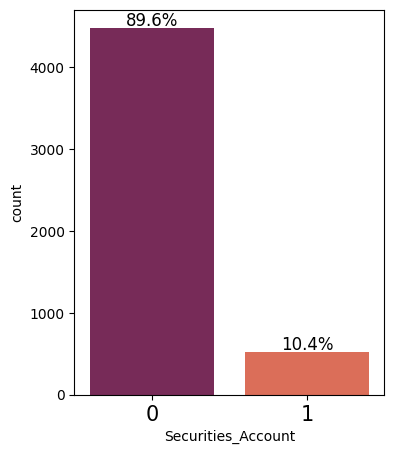

In [ ]:
bar_lab(data, "Securities_Account", perc=True)

Observations: Only 10.4% of customers have securities account with the bank.

**Distribution of CD Account**

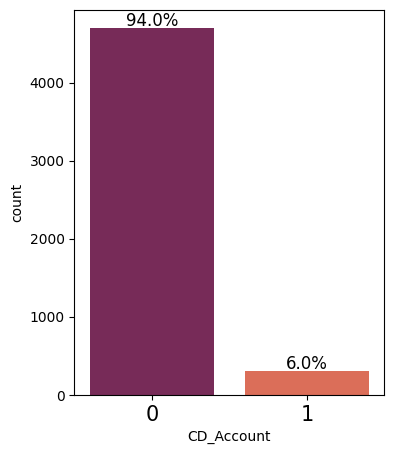

In [ ]:
bar_lab(data, "CD_Account", perc=True)

Observations: Only 6% of customers have a certificate of deposit (CD) account with the bank.

**Distribution of Online**

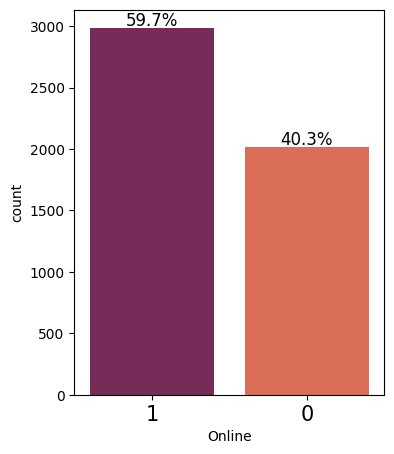

In [ ]:
bar_lab(data, "Online", perc=True)

Observations: 59.7% customers use internet banking facilities.

**Distribution of Credit Card**

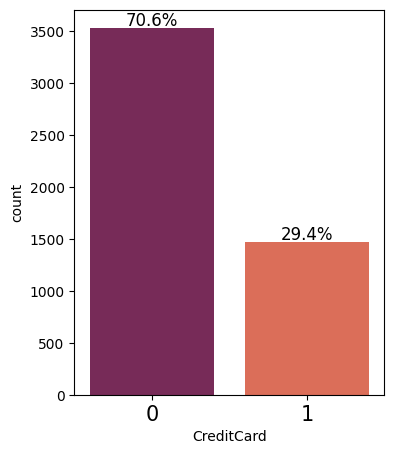

In [ ]:
bar_lab(data, "CreditCard", perc=True)

In [ ]:
data['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

**Questions:**

**How many customers have credit cards?**

Observations: 1470 which is 29.4% of total customers have a credit card issued by any other Bank.

**Bivariant Analysis**

**Heat Map**

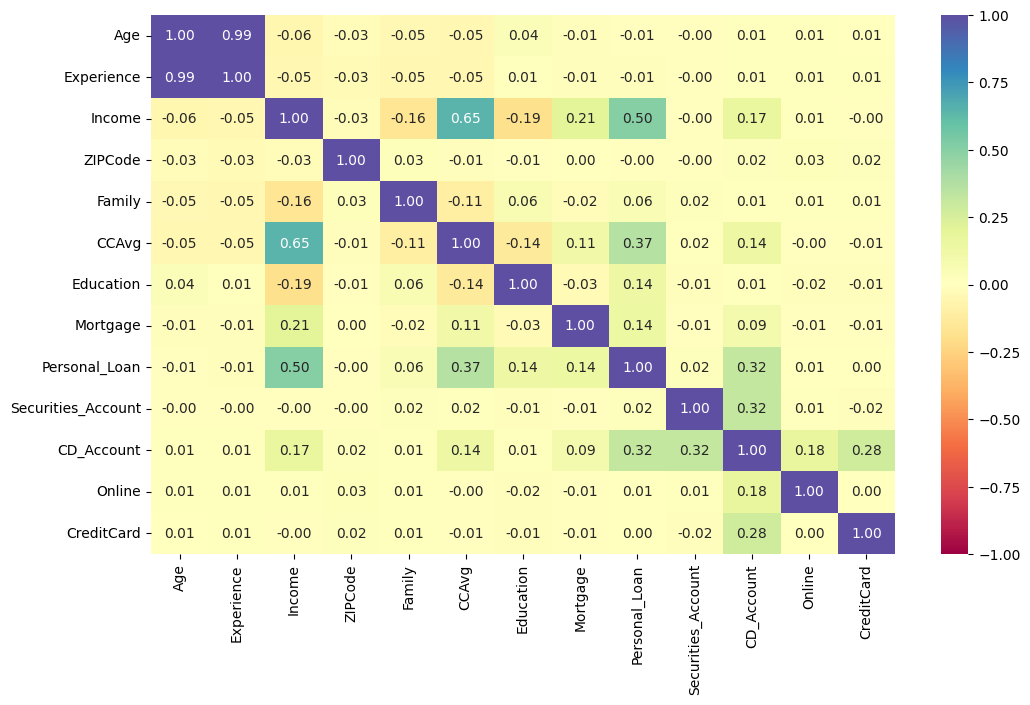

In [ ]:
# Let's find out the correlations between the variables
plt.figure(figsize=(12, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Questions:**

**What are the attributes that have a strong correlation with the target attribute (personal loan)?**

Observations:

Personal Loan shows correlation to Income, CCAvg, CD_Account and low correlation to Education and Mortgage.

Income vs CCAvg also has a moderate correlation.

Age vs Experience show multicollinearity. Therefore we should check VIF and drop one of the variables.

In [ ]:
# check for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

      feature      VIF
0         Age 23.44663
1  Experience 16.50668
2      Income  6.25280
3       CCAvg  3.83500
4    Mortgage  1.36840


Observations: Age and Experience have very high VIF, indicating very high multicollinearity, therefore one of the variables should be removed.

In [ ]:
# Let's drop Experience column to avoid multicollinearity.
data = data.drop(["Experience"], axis=1)
data.head()

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,49,91,4,1.60000,1,0,0,1,0,0,0
1,45,34,90,3,1.50000,1,0,0,1,0,0,0
2,39,11,94,1,1.00000,1,0,0,0,0,0,0
3,35,100,94,1,2.70000,2,0,0,0,0,0,0
4,35,45,91,4,1.00000,2,0,0,0,0,0,1


**Bivariant Analysis**

**Target vs Independent Variables**

**Personal Loan Vs ZIPCode / Personal Loan Vs Family**

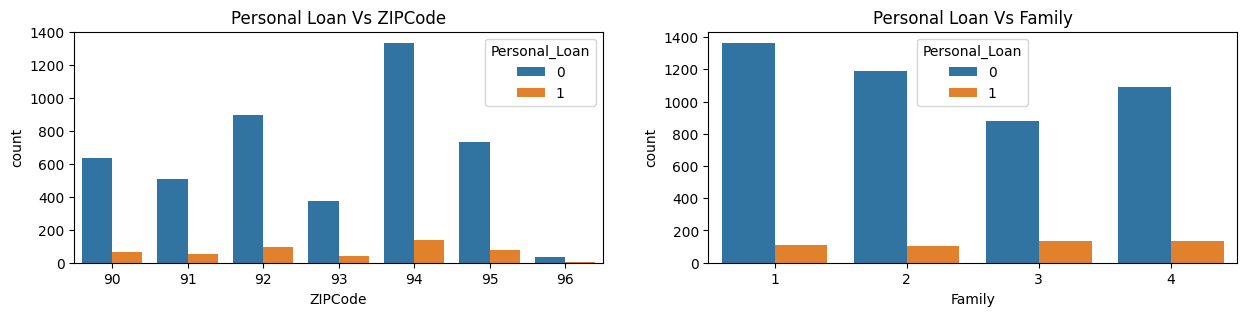

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

sns.countplot(ax=axes[0], data=data, x='ZIPCode', hue='Personal_Loan').set(title='Personal Loan Vs ZIPCode')
sns.countplot(ax=axes[1], data=data, x='Family', hue='Personal_Loan').set(title='Personal Loan Vs Family');

**Observations**

Zipcode 94 has the highest count of accepting the personal loan offer during the last campaign.

When the number of people in the family is higher, there is a higher chance of accepting the personal loan.

**Personal Loan Vs Education / Personal Loan Vs Securities_Account**

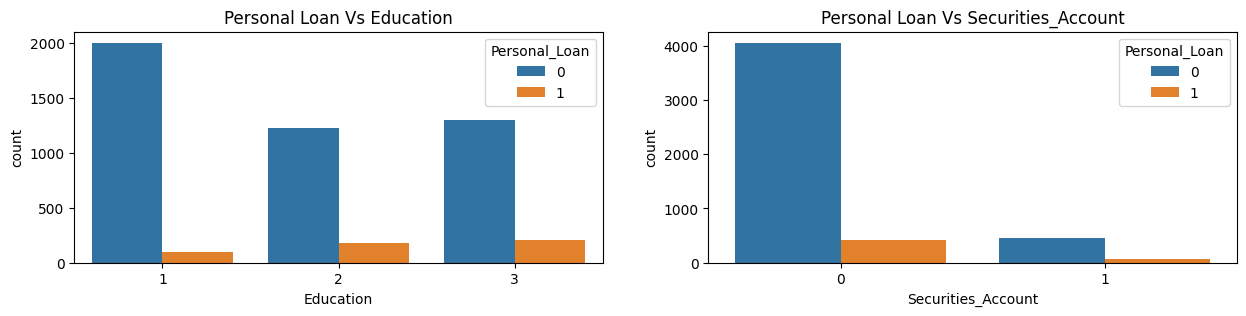

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

sns.countplot(ax=axes[0], data=data, x='Education', hue='Personal_Loan').set(title='Personal Loan Vs Education')
sns.countplot(ax=axes[1], data=data, x='Securities_Account', hue='Personal_Loan').set(title='Personal Loan Vs Securities_Account');

**Questions:**

**How does a customer's interest in purchasing a loan vary with their education?**

Observations:

When the person is more educated there is higher chance of getting the loan.

Loan acceptance rate is lower for those who have securities account.

**Personal Loan Vs CD_Account / Personal Loan Vs Online**

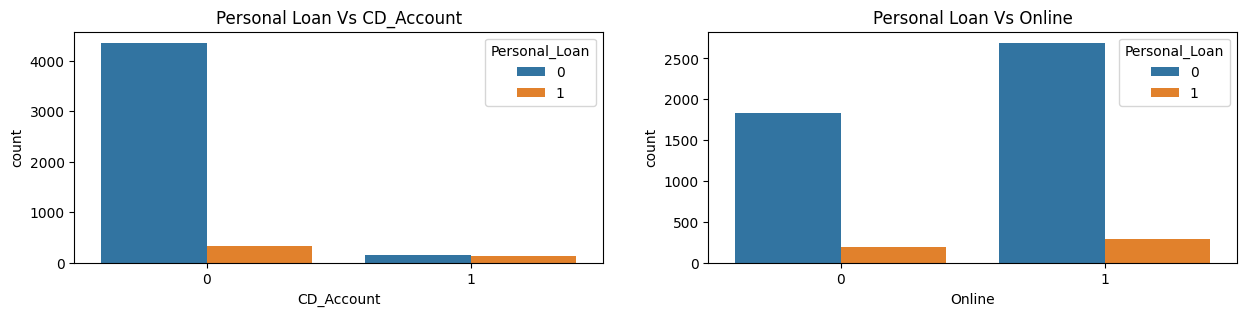

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

sns.countplot(ax=axes[0], data=data, x='CD_Account', hue='Personal_Loan').set(title='Personal Loan Vs CD_Account')
sns.countplot(ax=axes[1], data=data, x='Online', hue='Personal_Loan').set(title='Personal Loan Vs Online');

**Observations:**

If the person has a CD_Account there is a lower chance of accepting the loan.

Customers who use online banking show higher loan acceptance.

**Personal Loan Vs CreditCard**

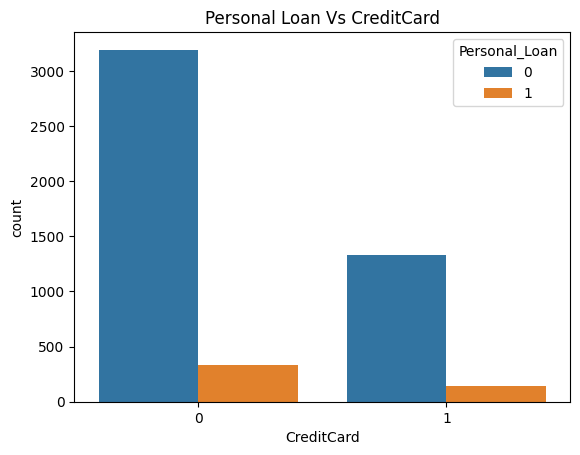

In [ ]:
sns.countplot(data=data, x='CreditCard', hue='Personal_Loan').set(title='Personal Loan Vs CreditCard');

**Observations:**

Customers who have credit cards from other banks show low loan acceptance.

**Personal Loan Vs Mortgage**

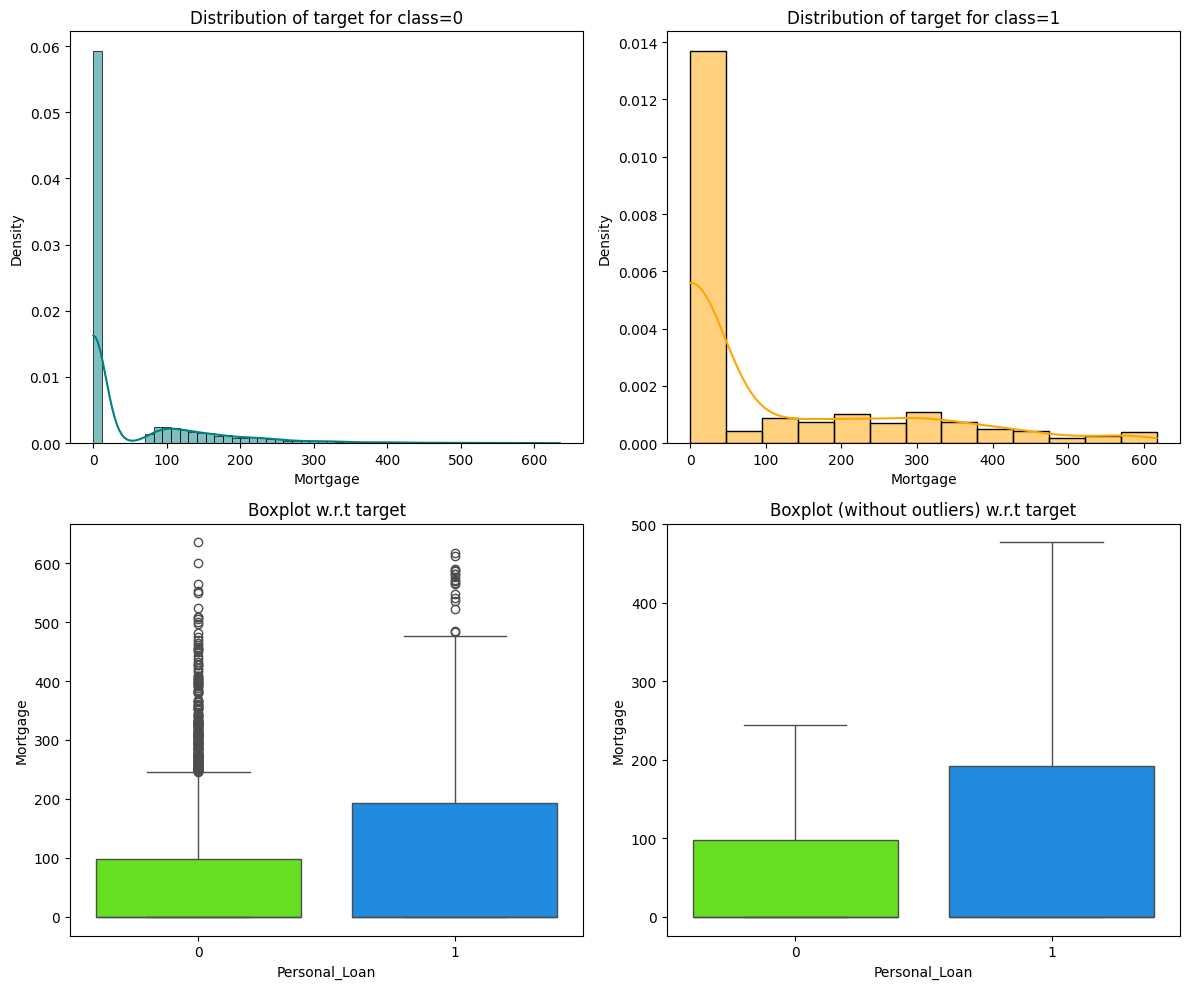

In [ ]:
pred_wrt_target(data, "Mortgage", "Personal_Loan")

Observations: 50% of the customers who accepted Personal loan has a mortgage between 0-200 thousand dollars. Mortgage range is greater for loan accepted group than not accepted group.

**Personal Loan Vs Age**

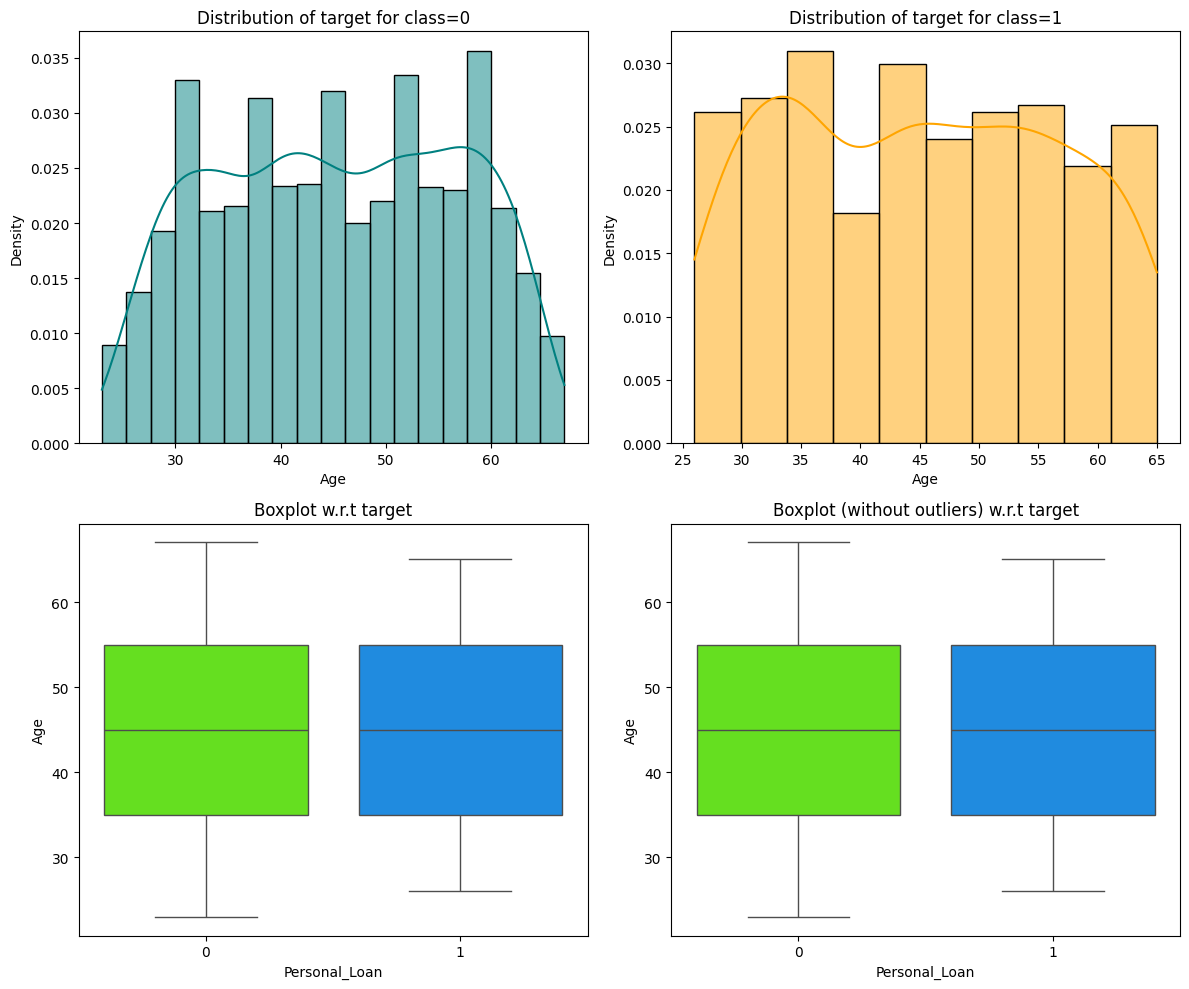

In [ ]:
pred_wrt_target(data, "Age", "Personal_Loan")

In [ ]:
data.groupby(['Personal_Loan'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_Loan,,,,,,,,
0,4520.00000,45.36726,11.45043,23.00000,35.00000,45.00000,55.00000,67.00000
1,480.00000,45.06667,11.59096,26.00000,35.00000,45.00000,55.00000,65.00000


**Questions:**

**How does a customer's interest in purchasing a loan vary with their age?**

Observations:

Age range for loan accepted is narrower (26-65 years) than the age range (23-67 years) for loan not accepted. That means comparatively very young and very old customers in this group do not accept the loan. However the median age is the same for both loan accepted and not accepted groups.

**Personal Loan Vs Income**

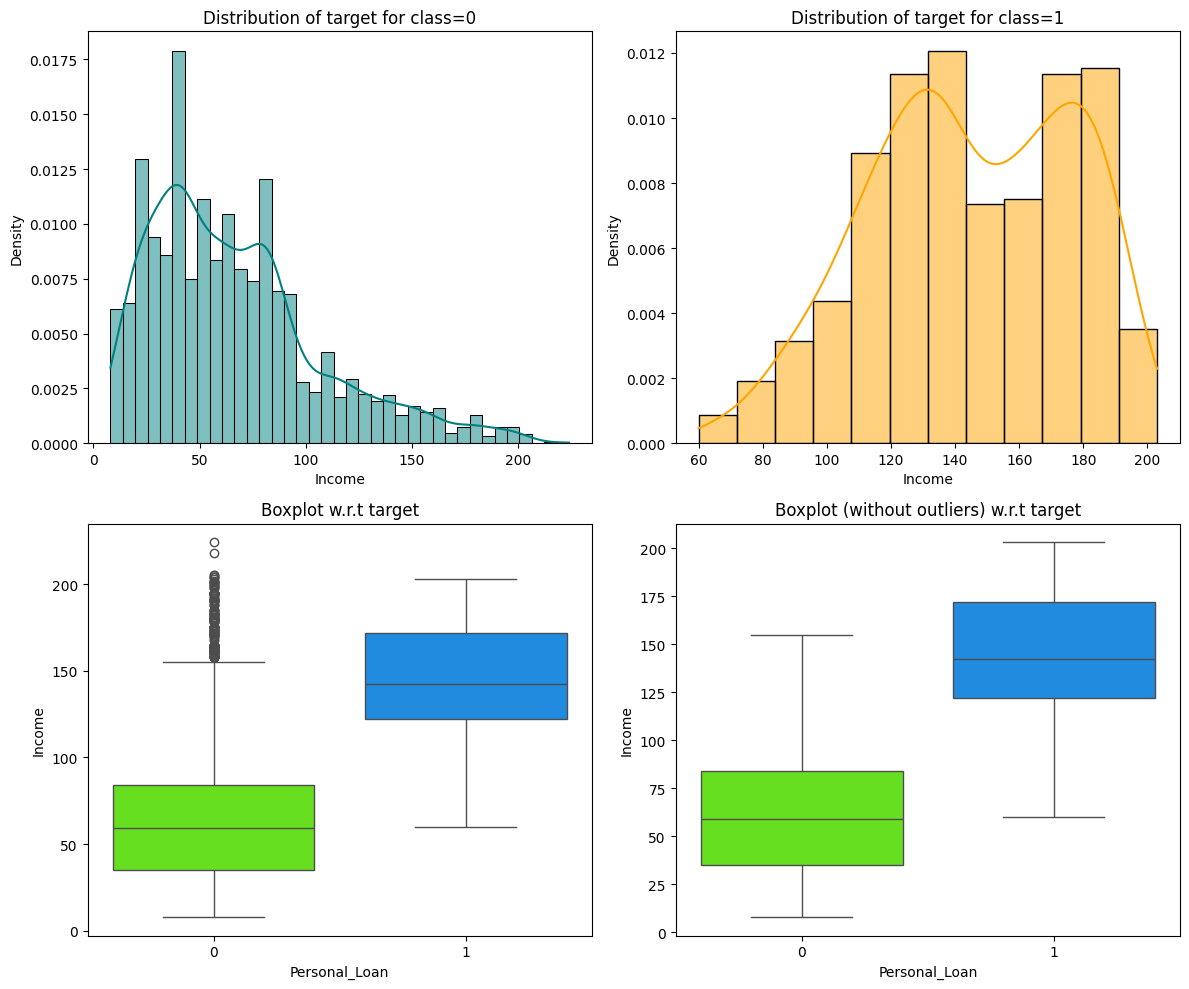

In [ ]:
pred_wrt_target(data, "Income", "Personal_Loan")

In [ ]:
data.groupby(['Personal_Loan'])['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_Loan,,,,,,,,
0,4520.00000,66.23739,40.57853,8.00000,35.00000,59.00000,84.00000,224.00000
1,480.00000,144.74583,31.58443,60.00000,122.00000,142.50000,172.00000,203.00000


**Observations:**

High median income (~$142.5 k) customers tend to accept the loan greater than the low median income customers.

**Personal Loan Vs CCAvg**

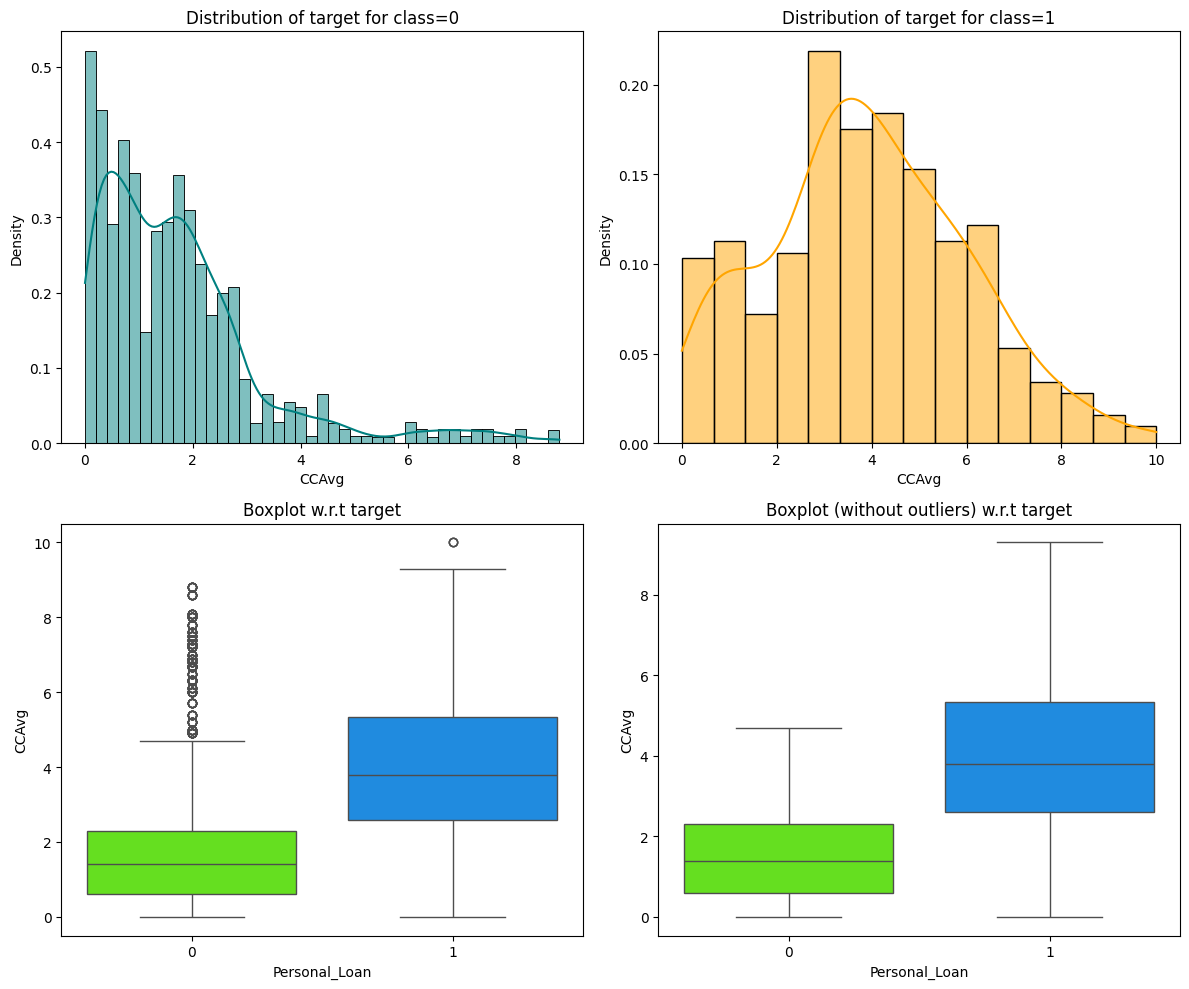

In [ ]:
pred_wrt_target(data, "CCAvg", "Personal_Loan")

In [ ]:
data.groupby(['Personal_Loan'])['CCAvg'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_Loan,,,,,,,,
0,4520.00000,1.72901,1.56765,0.00000,0.60000,1.40000,2.30000,8.80000
1,480.00000,3.90535,2.09768,0.00000,2.60000,3.80000,5.34750,10.00000


**Observations:**

Customers those who spend more with credit cards (median CCAvg = 3.8) show higher tendency to accept the loan than those who spend less with credit cards.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**Outlier Detection**

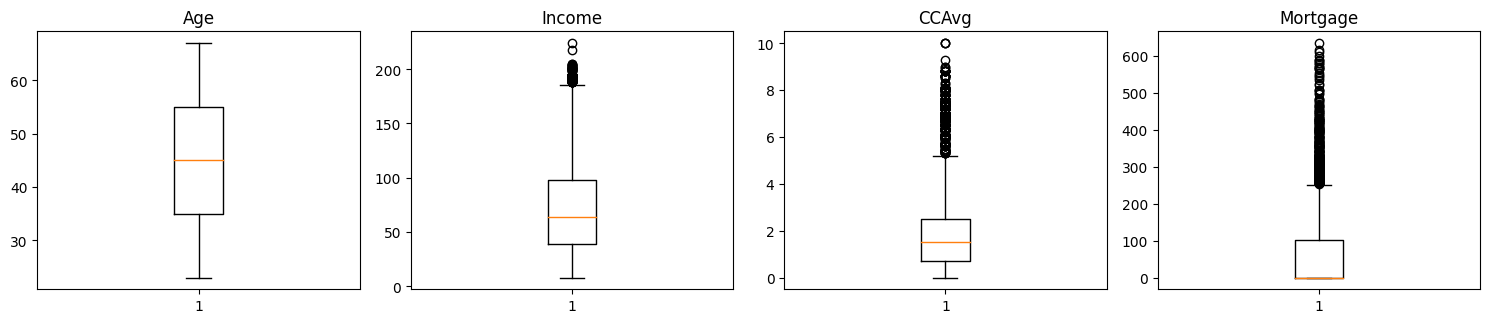

In [ ]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['Age', 'Income', 'CCAvg', 'Mortgage']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:

Although Income, CCAvg and Mortgage shows outliers, as Decision trees are not influenced by the outliers, not going to treat them at this moment.

## Preparing Data for Modeling

In [ ]:
# Separate target from predictors
X = data.drop(["Personal_Loan"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
X.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92',
       'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2',
       'Education_3'],
      dtype='object')

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0   0.90543
1   0.09457
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0   0.90067
1   0.09933
Name: proportion, dtype: float64


We had seen in original data that around 90.4% of observations belongs to class 0 (Not accepted) and 9.6% observations belongs to class 1 (Accepted), and this is preserved in the train and test sets.

## Model Building

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Evaluation Criterion

**Model can make wrong predictions as:**

Predicting accept loan but in reality, not accept (FP)

Predicting not accept but in reality, accept (FN)

**Which case is more important?**

If we predict that customer will accept the loan but in reality he doesn't then it is not good for the bank.

If we predict that a customer will not accept the loan but in reality he does then it is better for the bank.

**How to reduce the losses?**

So predicting FP is going to impact the bank. But predicting FN is not going to harm the bank. We need to minimize the FP in this case, so we have to have a high precision.

### Model Building

**Decision Tree Default**

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1, class_weight=None)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


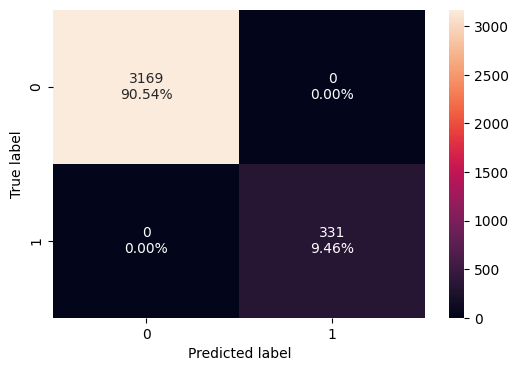

In [ ]:
# confusion matrix for train
confusion_matrix_sklearn(model, X_train, y_train)

# model perfomance matrix for train
dTree_default_train = model_performance_classification_sklearn(model, X_train, y_train)
dTree_default_train

,Accuracy,Recall,Precision,F1
0,0.98600,0.93289,0.92667,0.92977


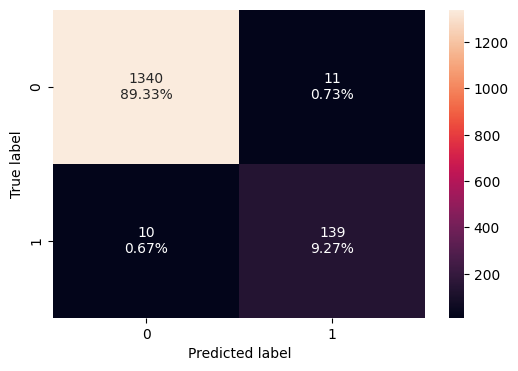

In [ ]:
# confusion matrix for test
confusion_matrix_sklearn(model, X_test, y_test)

# model perfomance matrix for test
dTree_default_test = model_performance_classification_sklearn(model, X_test, y_test)
dTree_default_test

**Decision Tree (class_weight_balance)**

In [ ]:
model1 = DecisionTreeClassifier(criterion="gini", random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


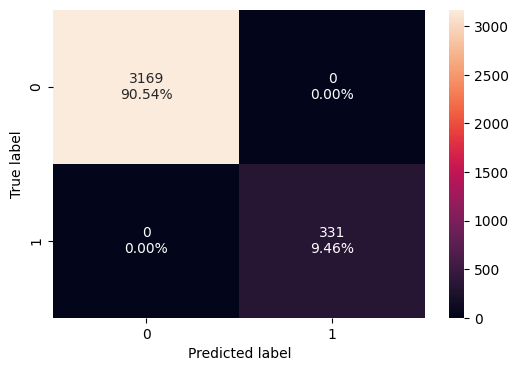

In [ ]:
# confusion matrix for train
confusion_matrix_sklearn(model1, X_train, y_train)

# model perfomance matrix for train
dTree_train_balanced = model_performance_classification_sklearn(model1, X_train, y_train)
dTree_train_balanced

,Accuracy,Recall,Precision,F1
0,0.97867,0.86577,0.91489,0.88966


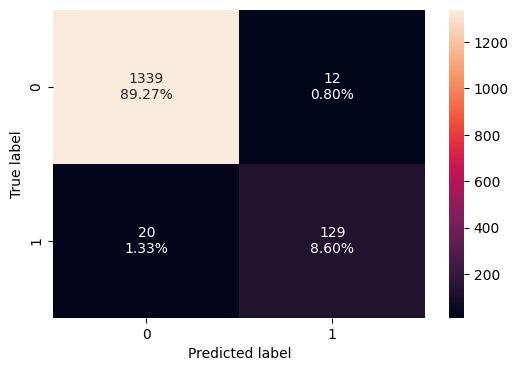

In [ ]:
# confusion matrix for test
confusion_matrix_sklearn(model1, X_test, y_test)

# model perfomance matrix for test
dTree_test_balanced = model_performance_classification_sklearn(model1, X_test, y_test)
dTree_test_balanced

### **Visualizing the decision tree for class weight balanced tree**

In [ ]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


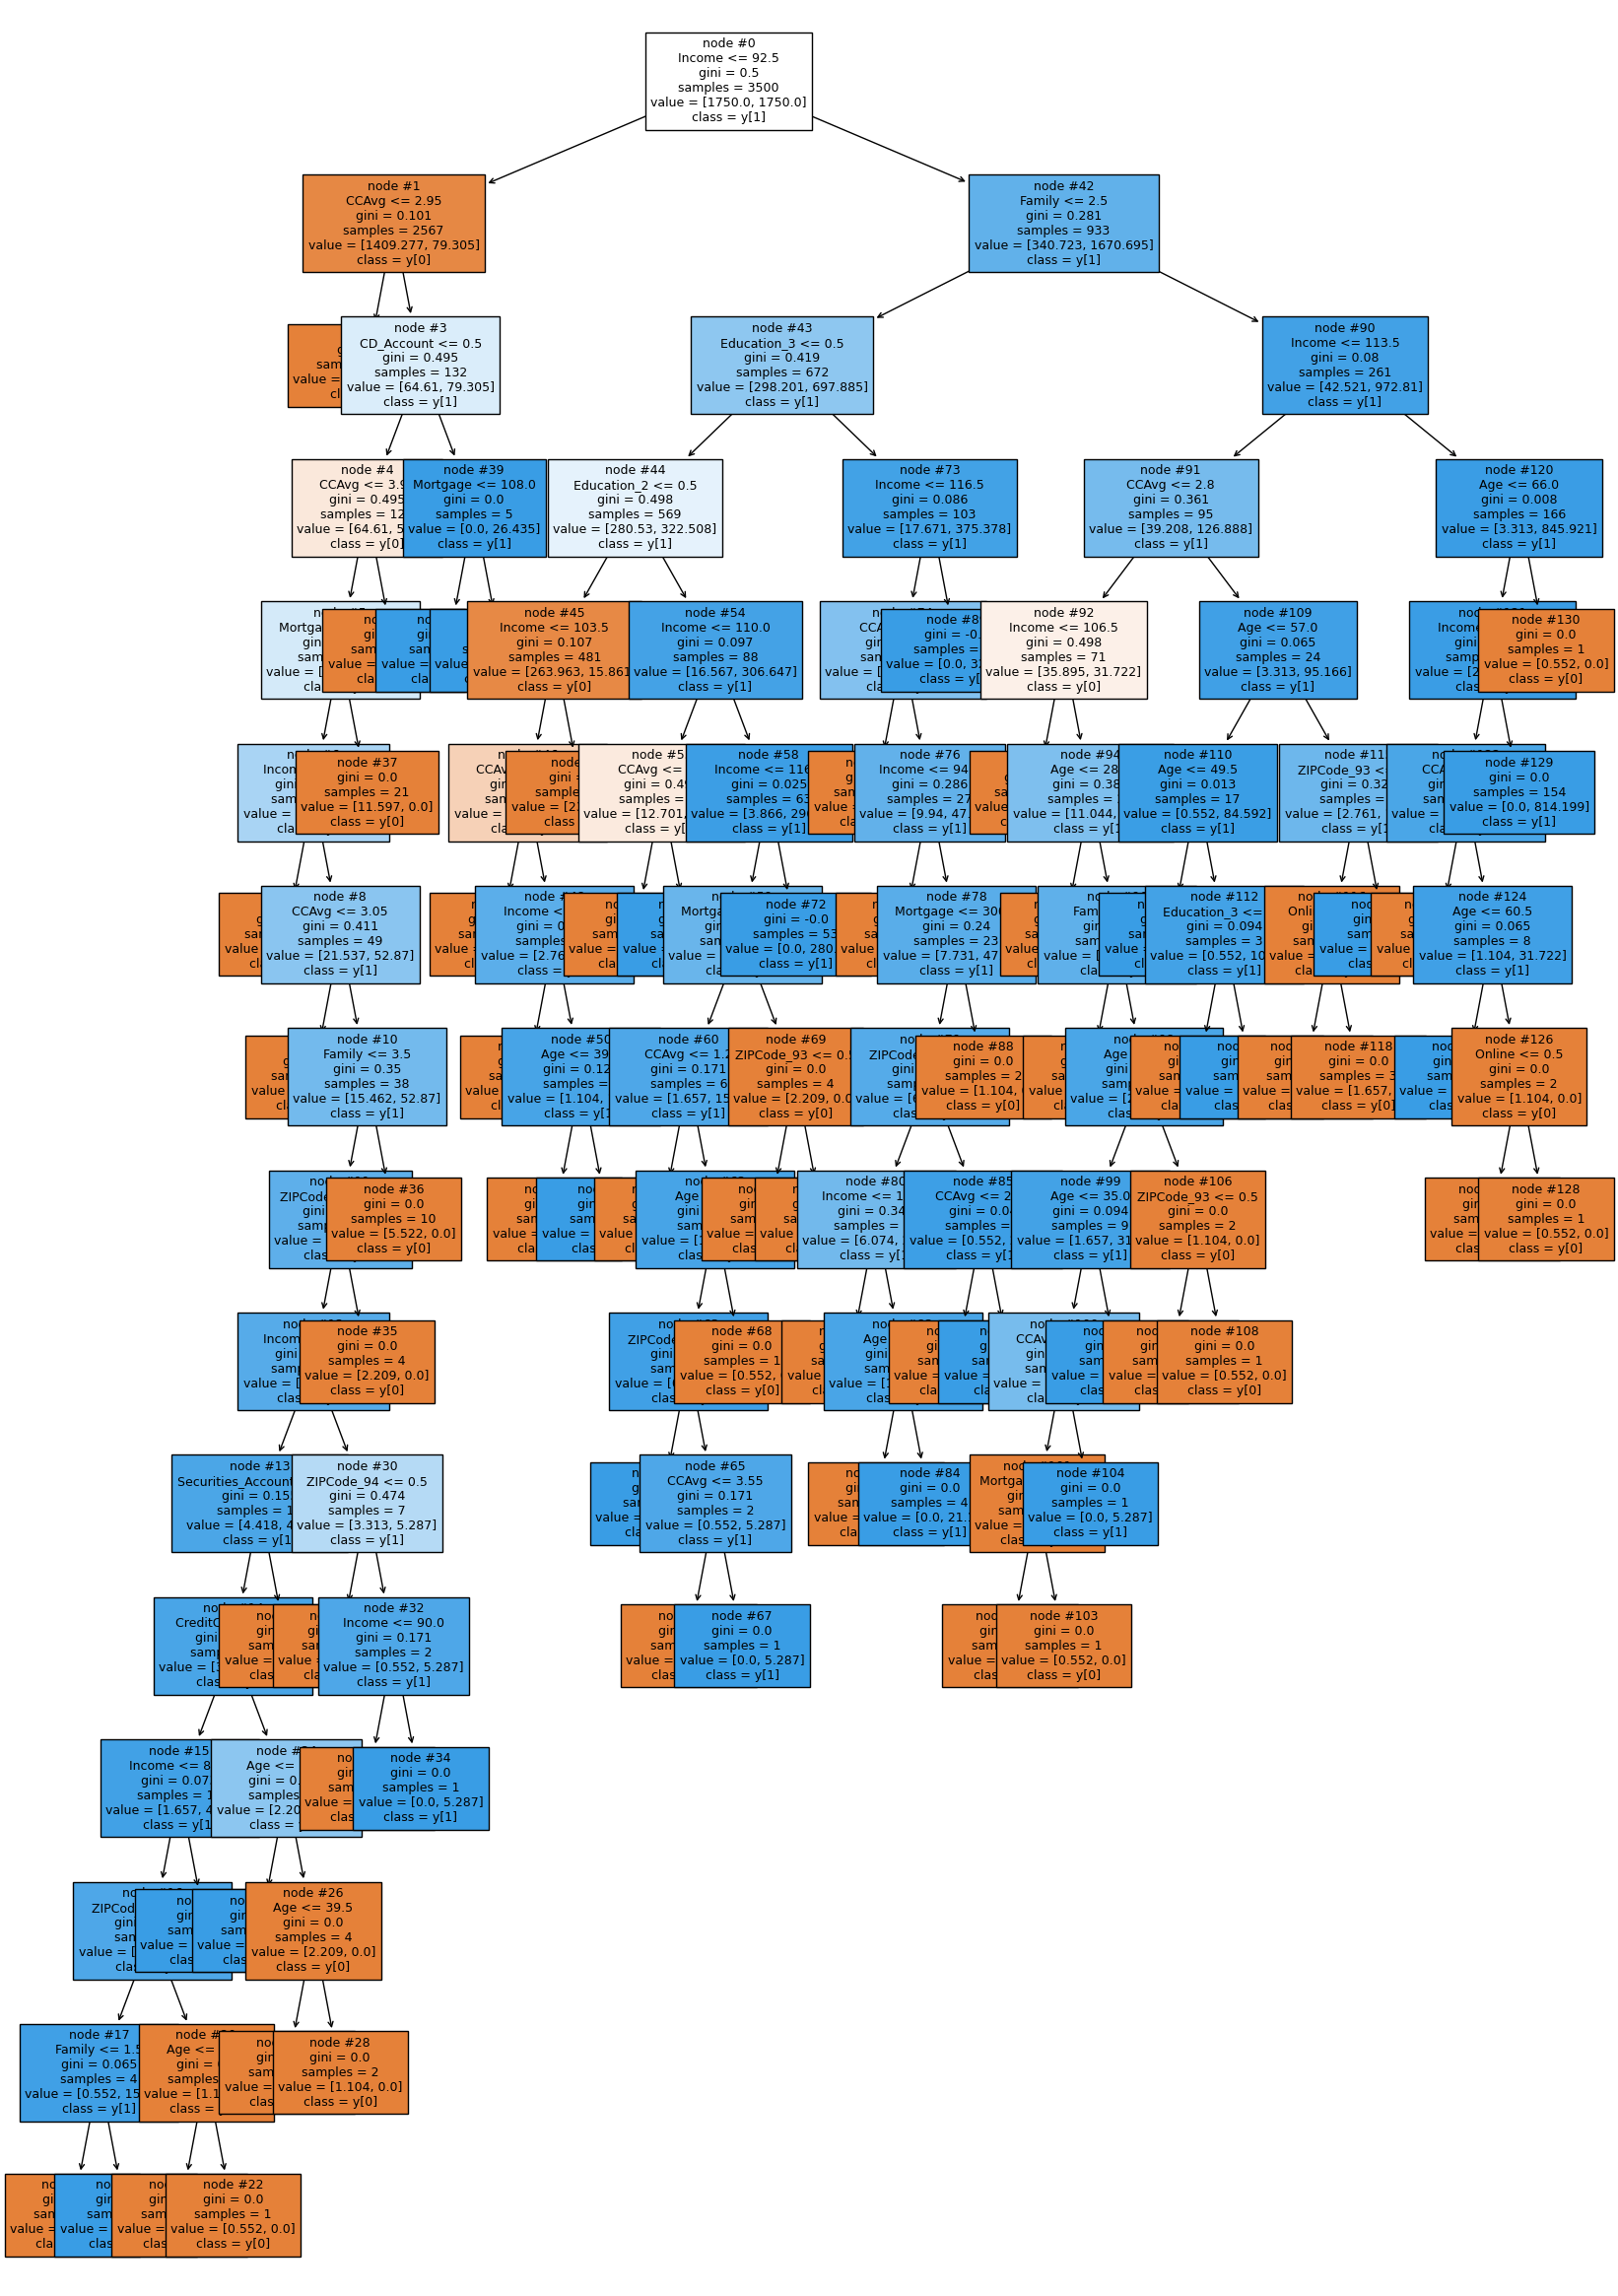

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(model1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Importance of features in the tree building
print (pd.DataFrame(model1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                       Imp
Income             0.64054
Education_2        0.13640
CCAvg              0.09210
Education_3        0.04863
Family             0.04574
Age                0.01269
Mortgage           0.00754
CD_Account         0.00746
ZIPCode_93         0.00250
ZIPCode_94         0.00239
ZIPCode_95         0.00185
ZIPCode_92         0.00110
Securities_Account 0.00053
CreditCard         0.00048
ZIPCode_91         0.00004
Online             0.00000
ZIPCode_96         0.00000


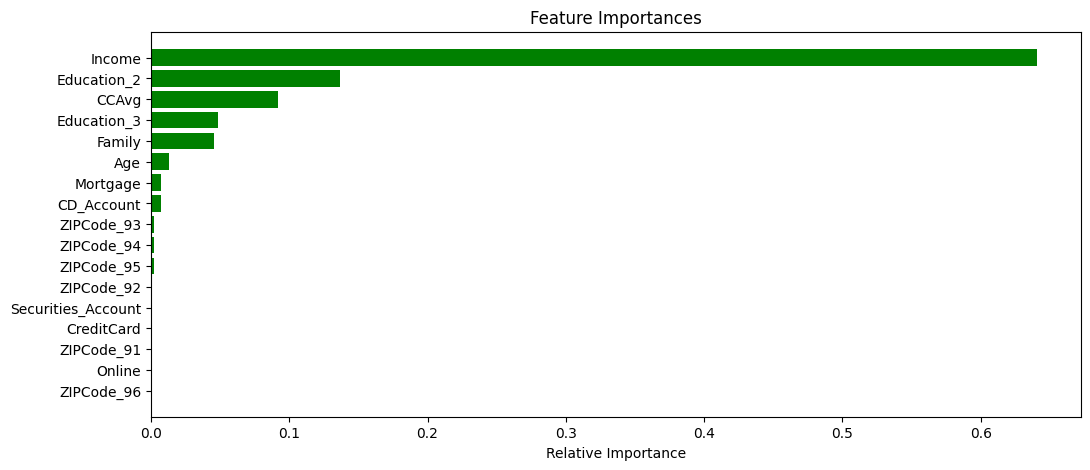

In [ ]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model Performance Improvement

**Pre Pruning with tuned hyperparameters**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(3, 6, 9),
    "min_samples_leaf": [5, 10, 20],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=5,
                       min_samples_leaf=5, random_state=1)

,Accuracy,Recall,Precision,F1
0,0.79029,1.00000,0.31080,0.47421


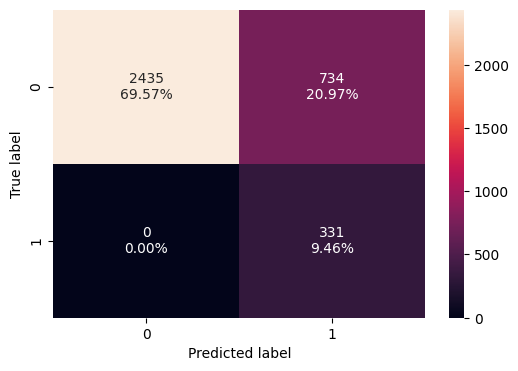

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

dTree_tuned_train = model_performance_classification_sklearn(estimator, X_train, y_train)
dTree_tuned_train

,Accuracy,Recall,Precision,F1
0,0.77933,1.00000,0.31042,0.47377


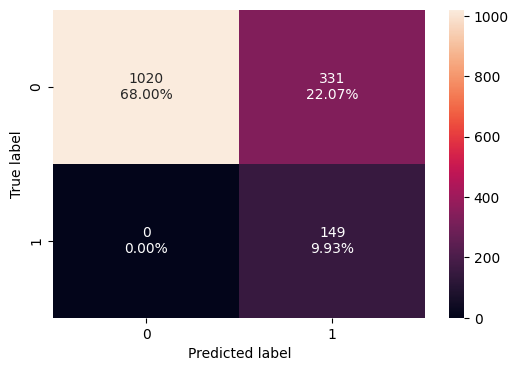

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

dTree_tuned_test = model_performance_classification_sklearn(estimator, X_test, y_test)
dTree_tuned_test

**Post Pruning (Cost Complexity Pruning)**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

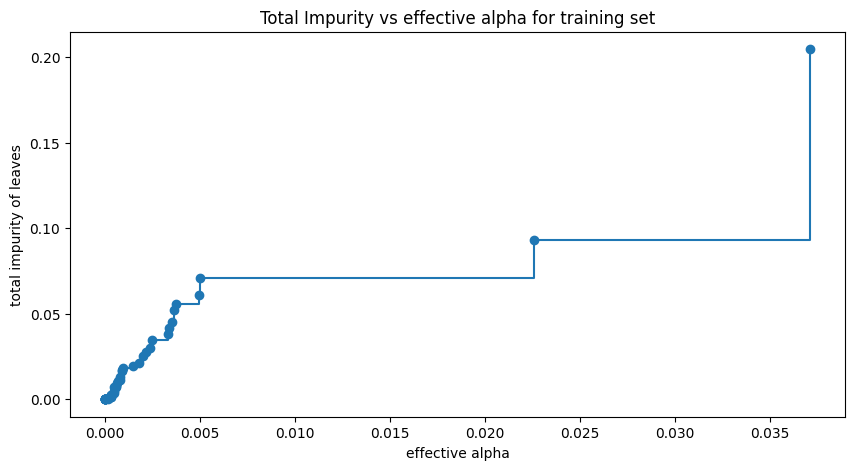

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992314


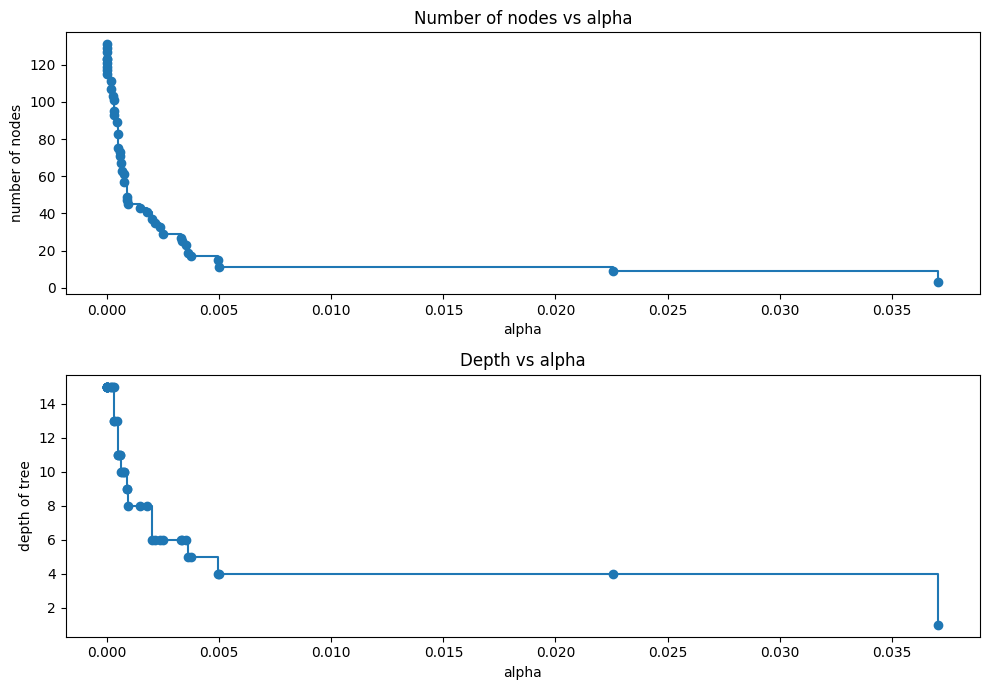

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
precision_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = precision_score(y_train, pred_train)
    precision_train.append(values_train)

precision_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = precision_score(y_test, pred_test)
    precision_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

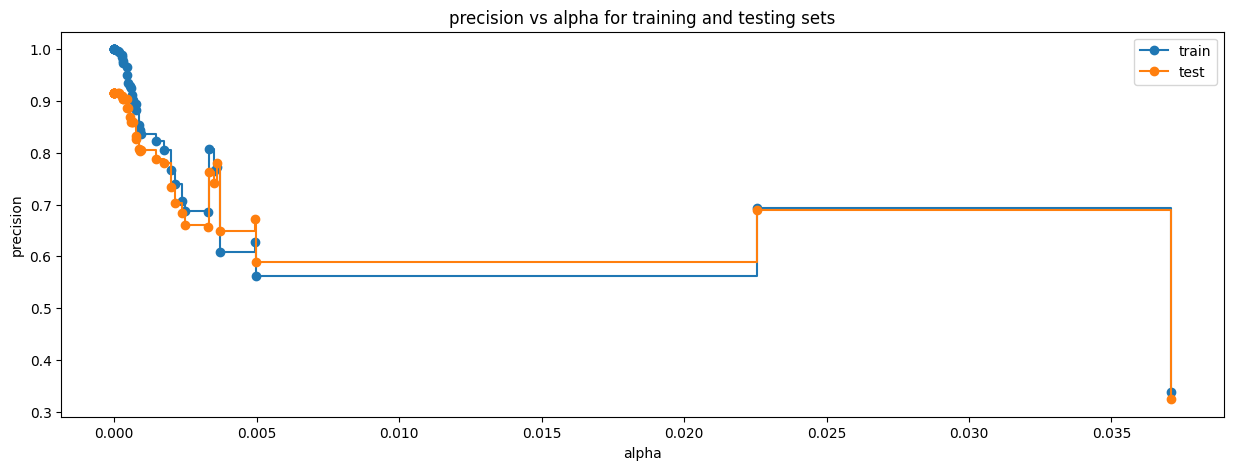

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("precision")
ax.set_title("precision vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, precision_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, precision_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test precision
index_best_model = np.argmax(precision_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00015675516802194858,
                       class_weight='balanced', random_state=1)


,Accuracy,Recall,Precision,F1
0,0.99943,1.00000,0.99399,0.99699


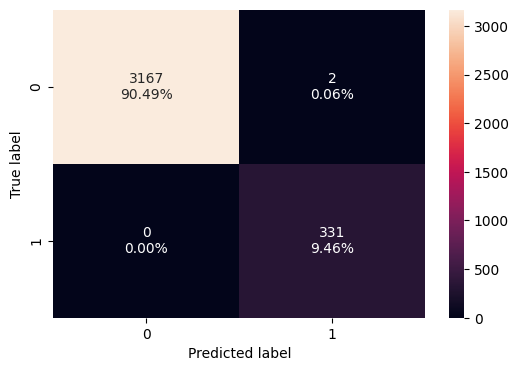

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

dTree_post_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
dTree_post_train

,Accuracy,Recall,Precision,F1
0,0.97933,0.87248,0.91549,0.89347


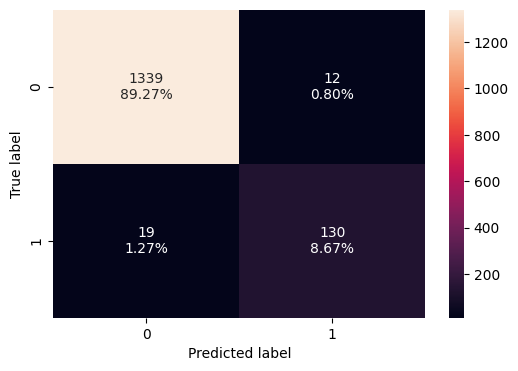

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

dTree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
dTree_post_test

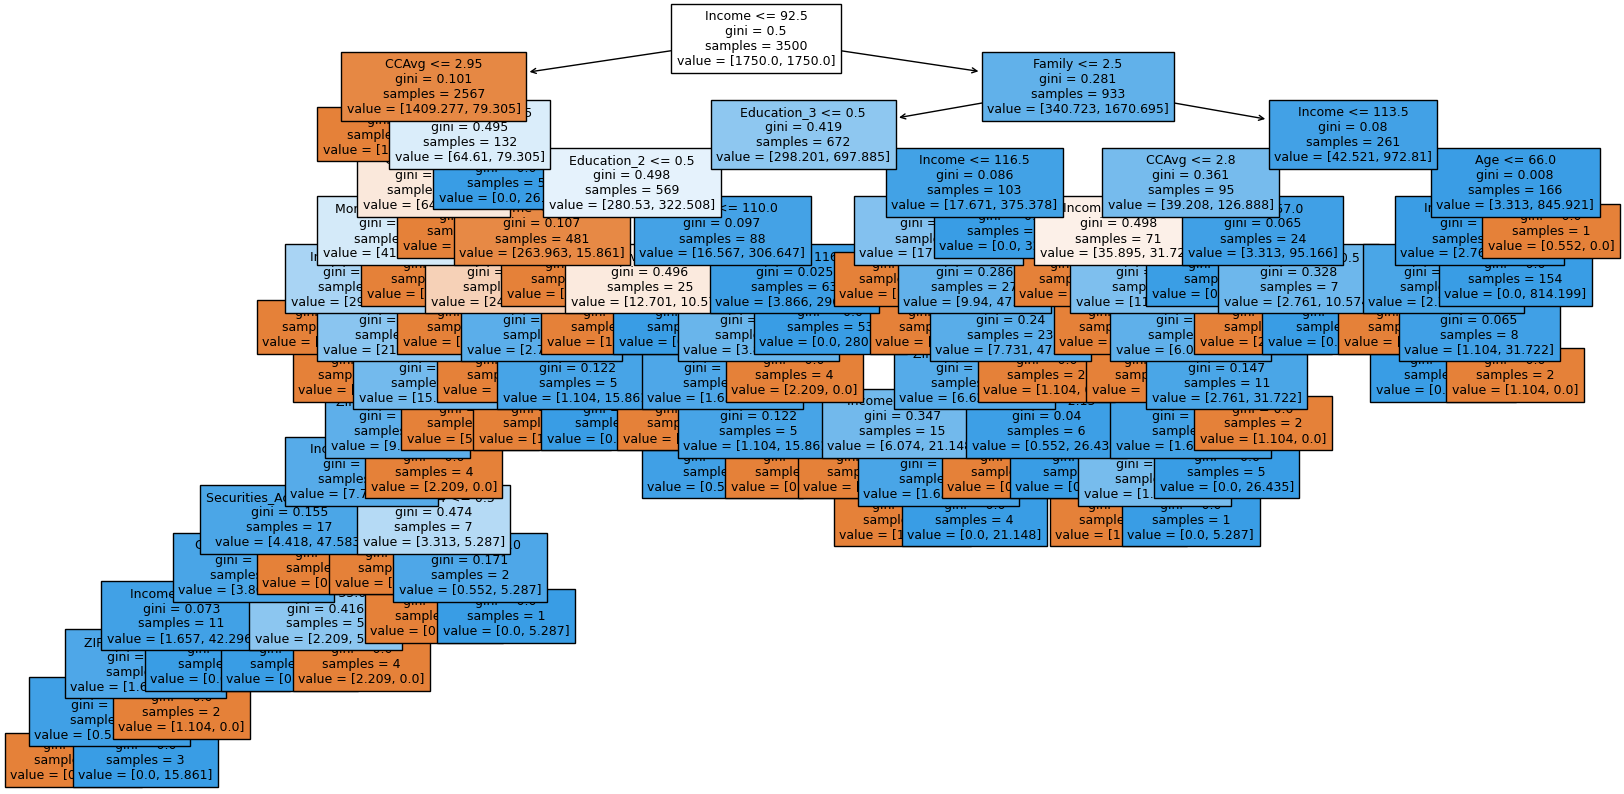

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [8.28, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [6.07, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- ZIPCode_95 <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Securities_Account >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |   |   |   |   |   |

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

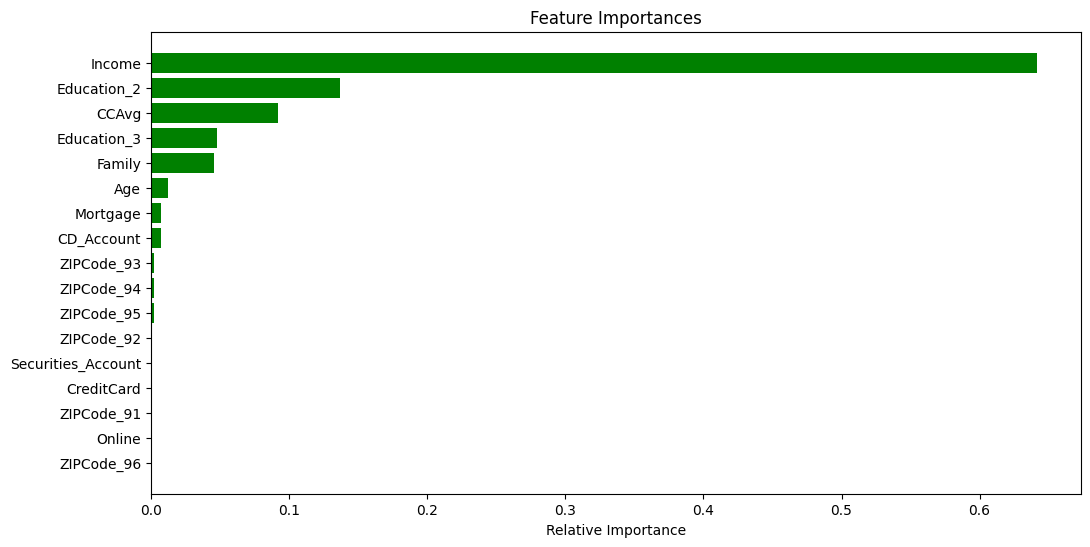

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:

We can see that the observation we got from the post-pruned tree is better than the pre-pruned tree.

# **Preparing Data for Modeling without Mortgage**

In [ ]:
# Separate target from predictors
P = data.drop(["Personal_Loan", "Mortgage"], axis=1)
Q = data["Personal_Loan"]

P = pd.get_dummies(P, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
P_train, P_test, Q_train, Q_test = train_test_split(
    P, Q, test_size=0.30, random_state=1
)

In [ ]:
P.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93',
       'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3'],
      dtype='object')

In [ ]:
print("Shape of Training set : ", P_train.shape)
print("Shape of test set : ", P_test.shape)
print("Percentage of classes in training set:")
print(Q_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(Q_test.value_counts(normalize=True))

Shape of Training set :  (3500, 16)
Shape of test set :  (1500, 16)
Percentage of classes in training set:
Personal_Loan
0   0.90543
1   0.09457
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0   0.90067
1   0.09933
Name: proportion, dtype: float64


**Desicion Tree (Default)**

In [ ]:
model2 = DecisionTreeClassifier(criterion="gini", random_state=1, class_weight="balanced")
model2.fit(P_train, Q_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


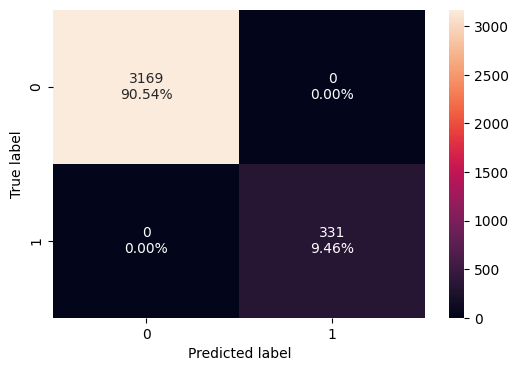

In [ ]:
# confusion matrix for train
confusion_matrix_sklearn(model2, P_train, Q_train)

# model perfomance matrix for train
dTree_balanced_train_2 = model_performance_classification_sklearn(model2, P_train, Q_train)
dTree_balanced_train_2

,Accuracy,Recall,Precision,F1
0,0.97933,0.86577,0.92143,0.89273


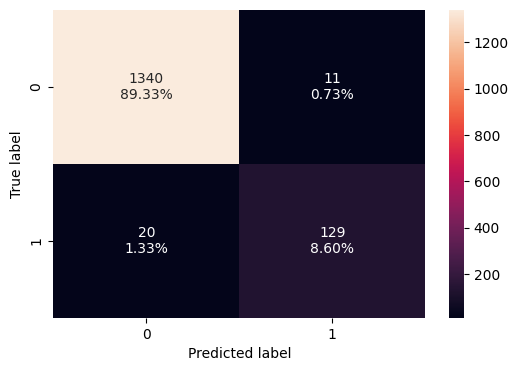

In [ ]:
# confusion matrix for test
confusion_matrix_sklearn(model2, P_test, Q_test)

# model perfomance matrix for test
dTree_balanced_test_2 = model_performance_classification_sklearn(model2, P_test, Q_test)
dTree_balanced_test_2

**Pre Pruning - Desicion Tree tuned**

In [ ]:
# Choose the type of classifier.
estimator1 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(3, 6, 9),
    "min_samples_leaf": [5, 10, 20],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator1, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(P_train, Q_train)

# Set the clf to the best combination of parameters
estimator1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator1.fit(P_train, Q_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=5,
                       min_samples_leaf=5, random_state=1)

,Accuracy,Recall,Precision,F1
0,0.79029,1.00000,0.31080,0.47421


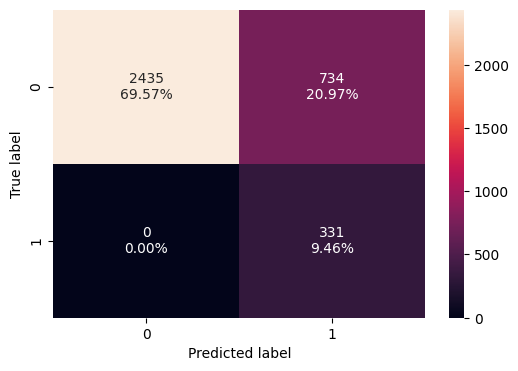

In [ ]:
confusion_matrix_sklearn(estimator1, P_train, Q_train)

dTree_tuned_train_2 = model_performance_classification_sklearn(estimator1, P_train, Q_train)
dTree_tuned_train_2

,Accuracy,Recall,Precision,F1
0,0.77933,1.00000,0.31042,0.47377


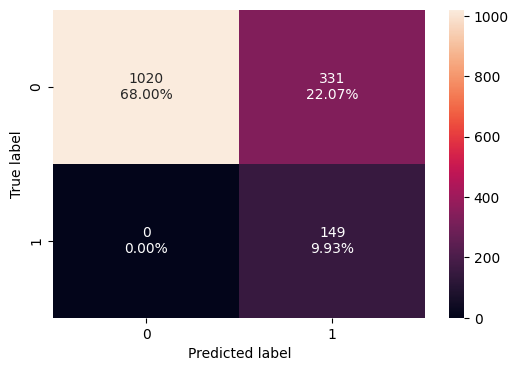

In [ ]:
confusion_matrix_sklearn(estimator1, P_test, Q_test)

dTree_tuned_test_2 = model_performance_classification_sklearn(estimator1, P_test, Q_test)
dTree_tuned_test_2

**Post Pruning**

In [ ]:
clf2 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf2.cost_complexity_pruning_path(P_train, Q_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

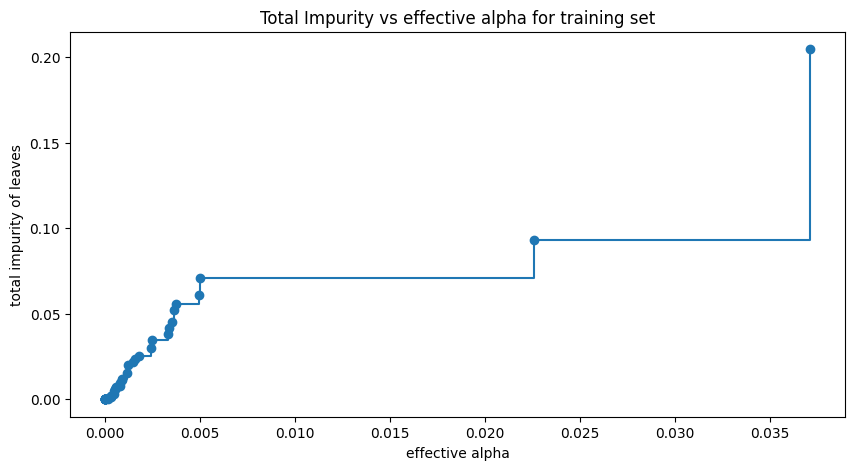

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf2 = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf2.fit(P_train, Q_train)
    clfs.append(clf2)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992319


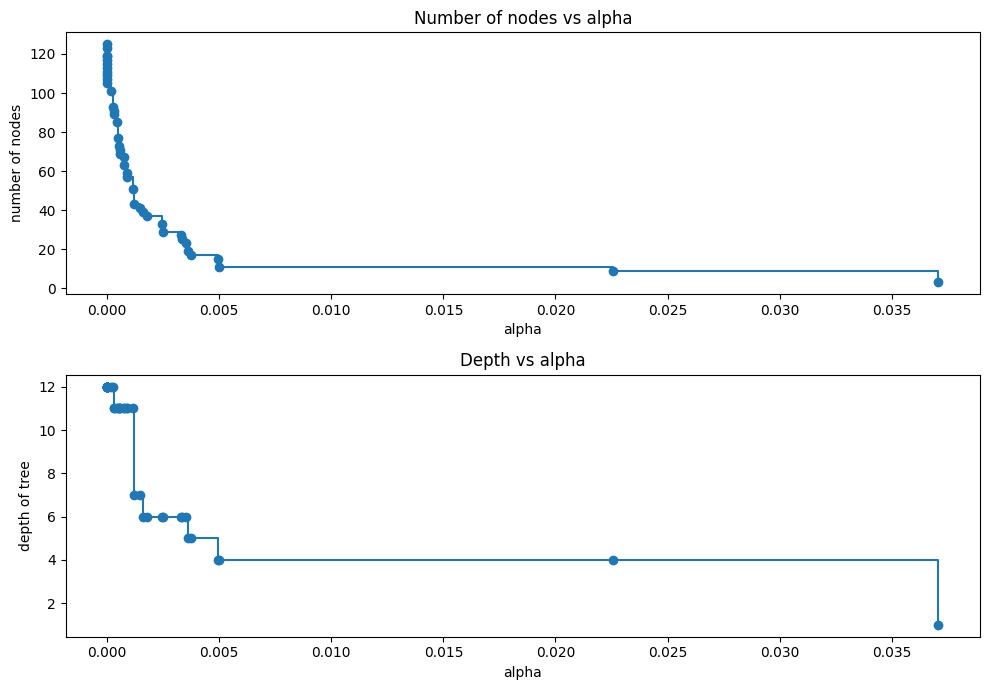

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf2.tree_.node_count for clf2 in clfs]
depth = [clf2.tree_.max_depth for clf2 in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
precision_train = []
for clf2 in clfs:
    pred_train = clf2.predict(P_train)
    values_train = precision_score(Q_train, pred_train)
    precision_train.append(values_train)

precision_test = []
for clf2 in clfs:
    pred_test = clf2.predict(P_test)
    values_test = precision_score(Q_test, pred_test)
    precision_test.append(values_test)

In [ ]:
train_scores = [clf2.score(P_train, Q_train) for clf2 in clfs]
test_scores = [clf2.score(P_test, Q_test) for clf2 in clfs]

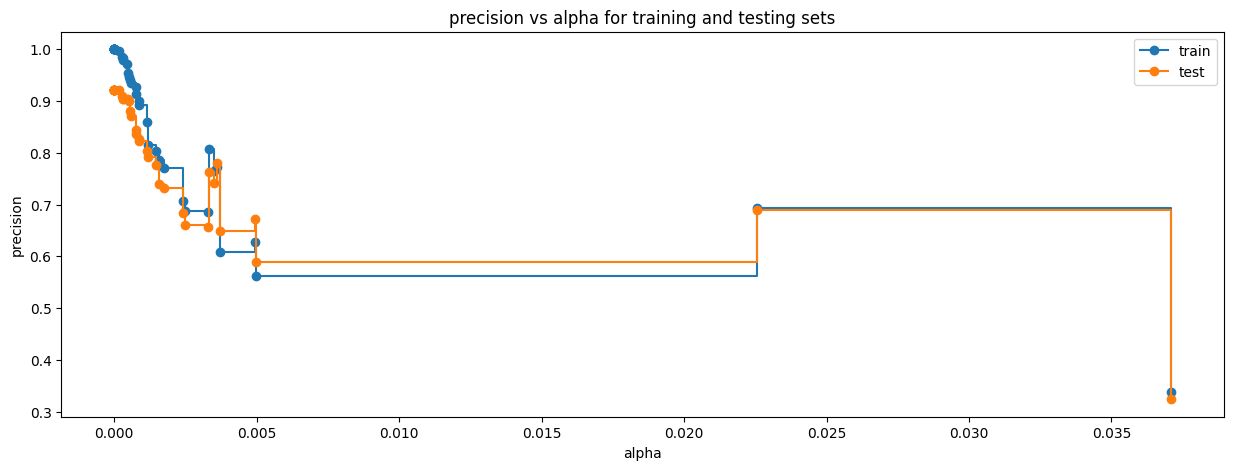

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("precision")
ax.set_title("precision vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, precision_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, precision_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test precision
index_best_model = np.argmax(precision_test)
best_model2 = clfs[index_best_model]
print(best_model2)

DecisionTreeClassifier(ccp_alpha=0.00015675516802194858,
                       class_weight='balanced', random_state=1)


,Accuracy,Recall,Precision,F1
0,0.99971,1.00000,0.99699,0.99849


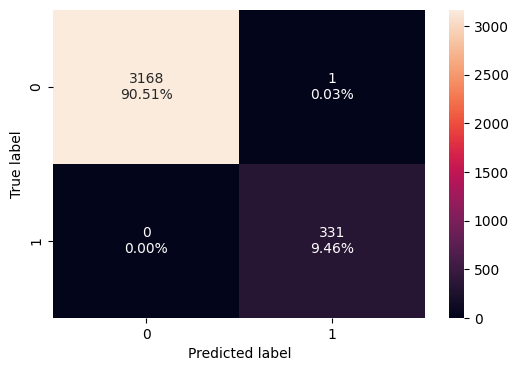

In [ ]:
confusion_matrix_sklearn(best_model2, P_train, Q_train)

dTree_post_train_2 = model_performance_classification_sklearn(
    best_model2, P_train, Q_train
)
dTree_post_train_2

,Accuracy,Recall,Precision,F1
0,0.98000,0.87248,0.92199,0.89655


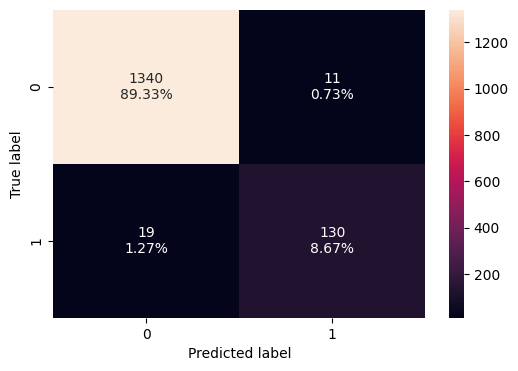

In [ ]:
confusion_matrix_sklearn(best_model2, P_test, Q_test)

dTree_post_test_2 = model_performance_classification_sklearn(
    best_model2, P_test, Q_test
)
dTree_post_test_2

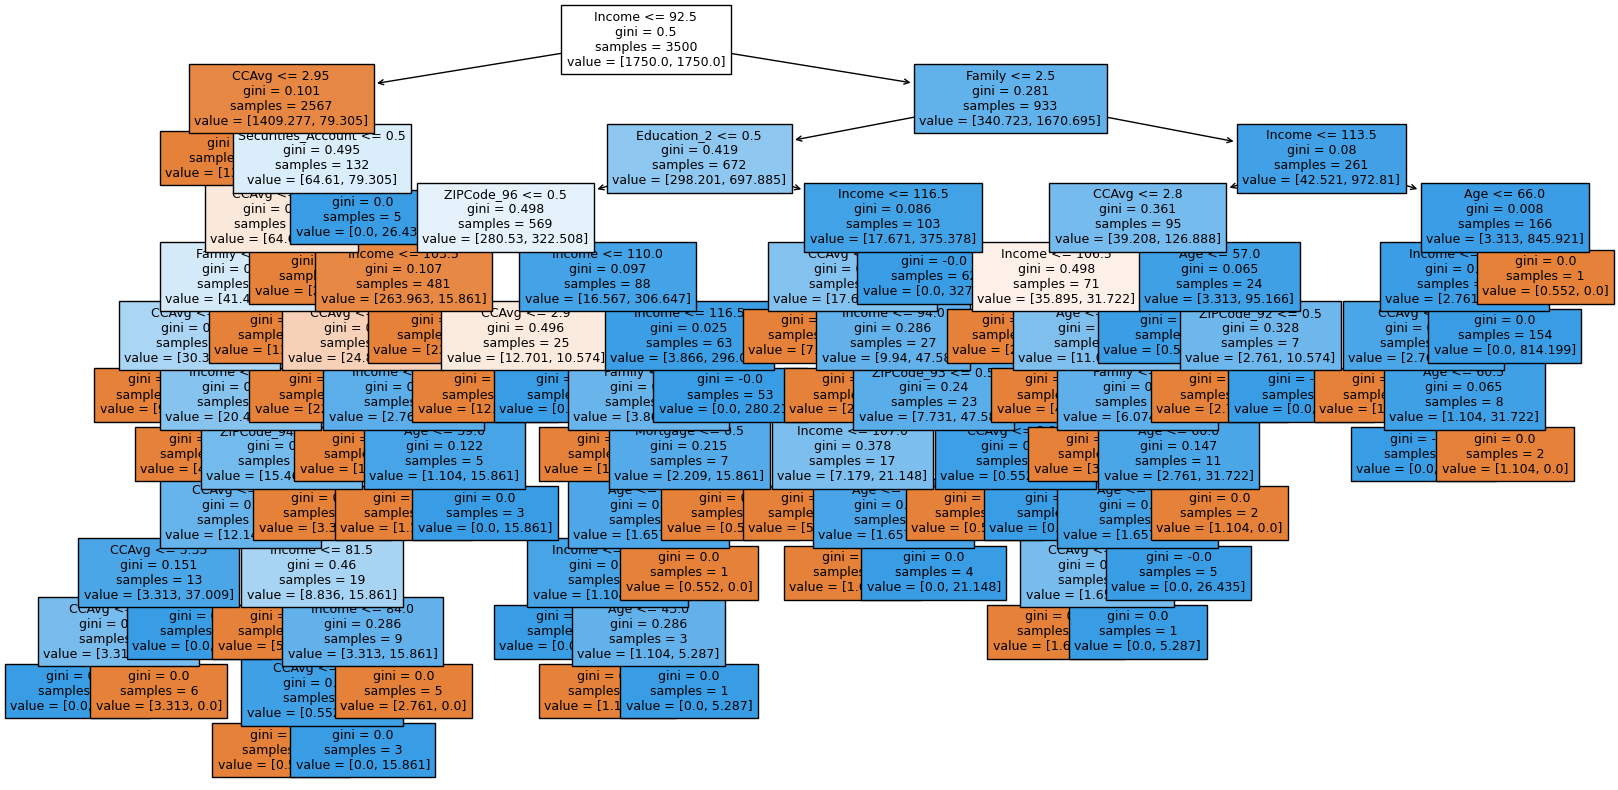

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
feature_names = list(P.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |--- weights: [9.94, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |   |--- weights: [4.97, 0.00] class: 0
|   |   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |   |--- ZIPCode_95 <= 0.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.15
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 10.57] class: 1
|   |   |   |   |   |   |   |   |   |   |--- CCAvg >  3.15
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [3.31, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- CCAvg >  3.35
|  

In [ ]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

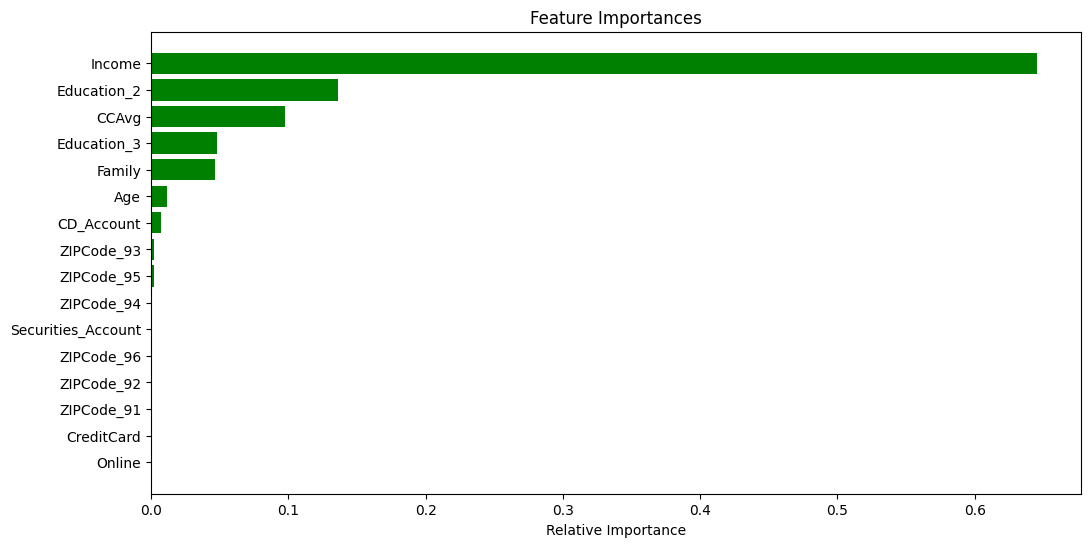

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Performance Matrix

In [ ]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        dTree_default_train.T,
        dTree_train_balanced.T,
        dTree_tuned_train.T,
        dTree_post_train.T,
        dTree_balanced_train_2.T,
        dTree_tuned_train_2.T,
        dTree_post_train_2.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree default",
    "Decision Tree class_weight_balanced",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree class_weight_balanced-no Mortgage",
    "Decision Tree (Pre-Pruning)-no Mortgage",
    "Decision Tree (Post-Pruning)-no Mortgage",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree default,Decision Tree class_weight_balanced,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning),Decision Tree class_weight_balanced-no Mortgage,Decision Tree (Pre-Pruning)-no Mortgage,Decision Tree (Post-Pruning)-no Mortgage
Accuracy,1.00000,1.00000,0.79029,0.99943,1.00000,0.79029,0.99971
Recall,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
Precision,1.00000,1.00000,0.31080,0.99399,1.00000,0.31080,0.99699
F1,1.00000,1.00000,0.47421,0.99699,1.00000,0.47421,0.99849


In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        dTree_default_test.T,
        dTree_test_balanced.T,
        dTree_tuned_test.T,
        dTree_post_test.T,
        dTree_balanced_test_2.T,
        dTree_tuned_test_2.T,
        dTree_post_test_2.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree default",
    "Decision Tree class_weight_balanced",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree class_weight_balanced-no Mortgage",
    "Decision Tree (Pre-Pruning)-no Mortgage",
    "Decision Tree (Post-Pruning)-no Mortgage",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree default,Decision Tree class_weight_balanced,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning),Decision Tree class_weight_balanced-no Mortgage,Decision Tree (Pre-Pruning)-no Mortgage,Decision Tree (Post-Pruning)-no Mortgage
Accuracy,0.98600,0.97867,0.77933,0.97933,0.97933,0.77933,0.98000
Recall,0.93289,0.86577,1.00000,0.87248,0.86577,1.00000,0.87248
Precision,0.92667,0.91489,0.31042,0.91549,0.92143,0.31042,0.92199
F1,0.92977,0.88966,0.47377,0.89347,0.89273,0.47377,0.89655


**Observations:**

*   Trees which are not pruned show overfitting to training data, as we can see from the accuracy, recall, precision and F-scores. Therefore those models are not suitable.

*   Pre pruned models show very low precision, F1-score and low accuracy. Only recall is god. But since we are interested in high precision pre-pruned models are also not suitable.

*   Post pruning trees give the most reliable outputs, with and without Mortgage.

*   But when we include Mortgage we get a slightly lower precision(0.91549),
accuracy (0.97933) and F1-score (0.89347) for post pruned tree. This might be caused by the fact that 69% of the customers do not have mortgages.

*   Therefore our best model is the post pruned model without Mortgage.


## Actionable Insights and Business Recommendations


*   The post pruned model can predict if a customer is going to accept the loan or not with a precision of 99.9%. And the model performed well on the test data, predicting loan acceptance with a precision of 92.2%. And the model has a very good accuracy, recall and a F1-score as well.

*   Income, Education, CCAvg, Family, Age and CD_Account are the most important variables we should consider when deciding whether a customer is going to accpet the loan or not.

*   Bank should focus on high median income (142.5 k) customers, or income ranges from 122k to 172k or above.

*   Bank should focus on more educated customers who has graduate degree or advanced/professional education.
*   Bank should focus on customers those who spend more with credit cards, median CCAvg of 3.8 or ranges from 2.6 to 5.35.

*   Bank should focus on customers who has more than 2 faily members.

*   Bank should focus on customers who are 26-65 years old.

*   Bank should focus on customers who doesn't have CD_Account.

* In addition bank should look for customers who live in zipcodes 94, 95, and 92.
*   As well as customers who use online banking, who has no securities account and who doesn't use credit cards from other banks.



___

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/AIML_UTA/Machine' matched no files
[NbConvertApp] WARNING | pattern 'Learning/Project/AIML_ML_Project_full_code_notebook_Diuni_Hetti.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterAp

CalledProcessError: Command 'jupyter nbconvert --to html /content/drive/MyDrive/AIML_UTA/Machine Learning/Project/AIML_ML_Project_full_code_notebook_Diuni_Hetti.ipynb
' returned non-zero exit status 255.